### Bollinger Band

In [14]:
#import needed libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data

In [15]:
#Let's create a function that takes ticker, starting period, ending period as arguments and return a data frame of the Adjusted Close Price 
def get_adj_close (ticker, start, end):
    info = data.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    return pd.DataFrame(info)
    

In [16]:
#Let's get Adjusted Closing Prices for Facebook, Amazon and Tesla
fb = get_adj_close('fb', '1/1/2016', '30/11/2020')
tesla = get_adj_close('tsla', '1/1/2016', '30/11/2020')
amazon = get_adj_close('amzn', '1/1/2016', '30/11/2020')

In [17]:
fb.head()

,Adj Close
Date,
2016-01-04,102.220001
2016-01-05,102.730003
2016-01-06,102.970001
2016-01-07,97.919998
2016-01-08,97.330002


In [18]:
#Let's calculate 20-days moving average, std deviation, uper and lower band
for item in (fb, tesla, amazon):
    item['20 Day MA'] = item['Adj Close'].rolling(window=20).mean()
    item['20 Day STD'] = item['Adj Close'].rolling(window=20).std()
    item['Upper band'] = item['20 Day MA'] + 2*item['20 Day STD']
    item['Lower band'] = item['20 Day MA'] - 2*item['20 Day STD']

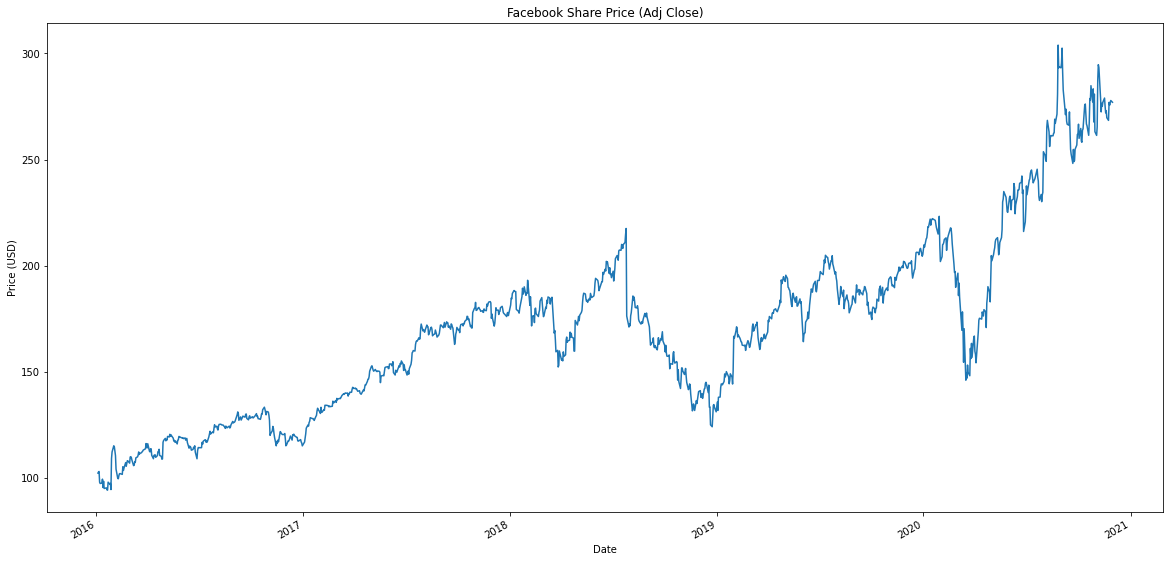

In [19]:
#Let's plot Facebook Share Price
fb['Adj Close'].plot(figsize=(20,10))
plt.title('Facebook Share Price (Adj Close)')
plt.ylabel('Price (USD)')
plt.show()

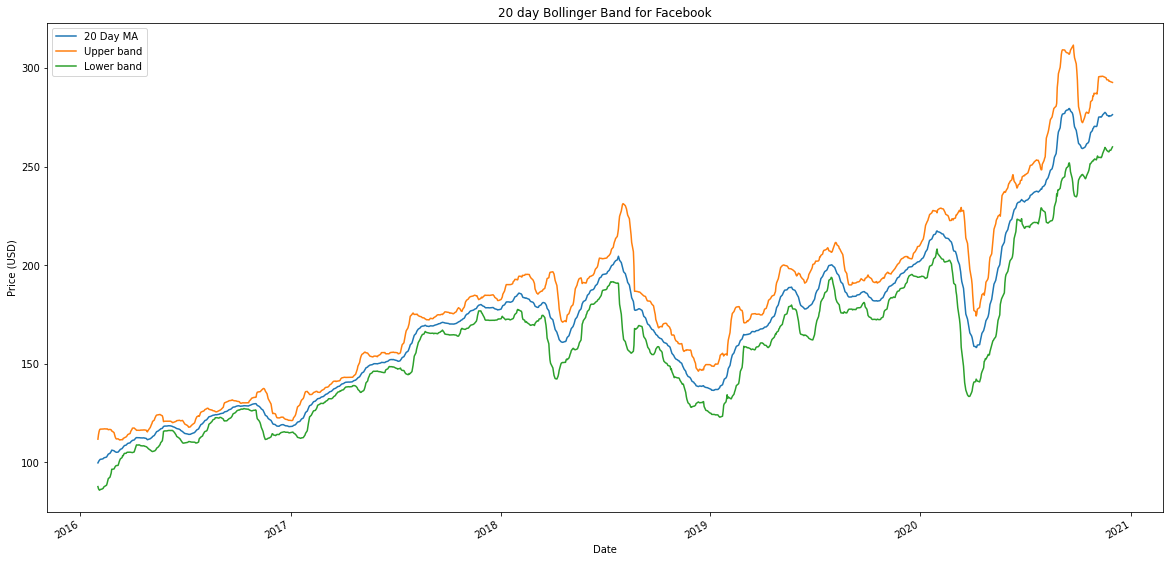

In [20]:
#Let's plot Facebook Bollinger Bands
fb[['20 Day MA', 'Upper band', 'Lower band']].plot(figsize=(20,10))
plt.title('20 day Bollinger Band for Facebook')
plt.ylabel('Price (USD)')
plt.show()

In [21]:
fb.tail(10)

,Adj Close,20 Day MA,20 Day STD,Upper band,Lower band
Date,,,,,
2020-11-16,278.959991,277.100497,9.150793,295.402084,258.798910
2020-11-17,275.000000,277.472498,8.890050,295.252597,259.692398
2020-11-18,271.970001,277.134497,8.967890,295.070277,259.198717
2020-11-19,272.940002,276.875497,9.012619,294.900736,258.850259
2020-11-20,269.700012,276.120998,8.946571,294.014140,258.227855
2020-11-23,268.429993,275.686998,9.105198,293.897394,257.476602
2020-11-24,276.920013,275.368498,8.935069,293.238636,257.498361
2020-11-25,275.589996,275.764497,8.749495,293.263488,258.265507
2020-11-27,277.809998,275.613498,8.683283,292.980064,258.246932


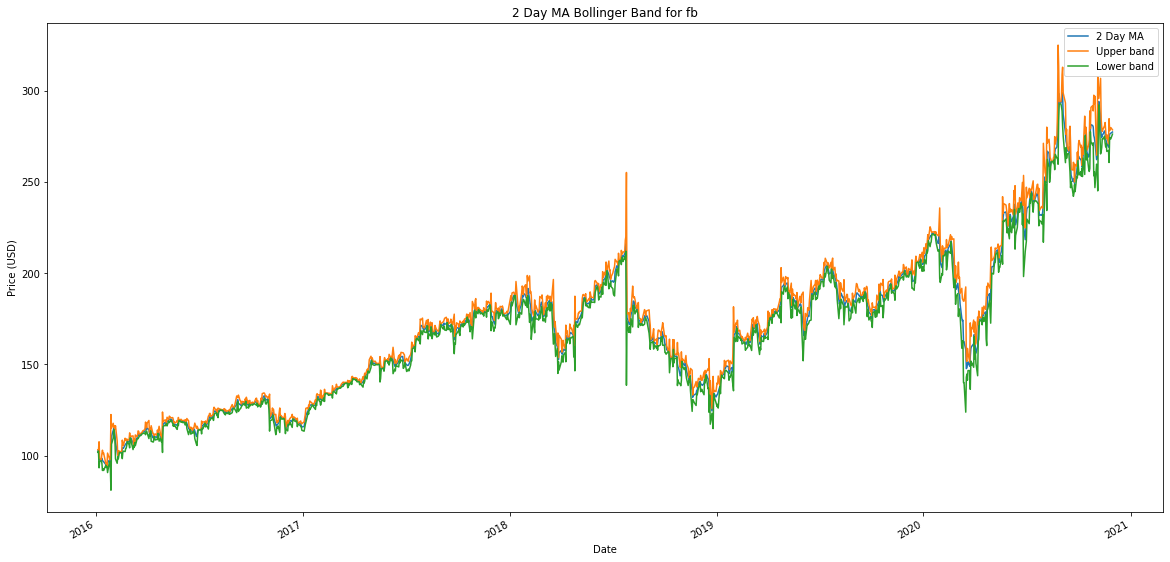

In [22]:
#What if we don't use the Moving Average to smooth the curve?

fb_2 = get_adj_close('fb', '1/1/2016', '30/11/2020')

fb_2['2 Day MA'] = fb_2['Adj Close'].rolling(window=2).mean()
fb_2['2 Day STD'] = fb_2['Adj Close'].rolling(window=2).std()
fb_2['Upper band'] = fb_2['2 Day MA'] + 2*fb_2['2 Day STD']
fb_2['Lower band'] = fb_2['2 Day MA'] - 2*fb_2['2 Day STD']

fb_2[['2 Day MA', 'Upper band', 'Lower band']].plot(figsize=(20,10))
plt.title( '2 Day MA Bollinger Band for fb')
plt.ylabel('Price (USD)')
plt.show()

In [23]:
#Let's write a function to automatize the process above 
def Bollinger_Band(ticker:str, start:str, end:str, moving_avg:int):
    
    df = get_adj_close(ticker, start, end)
    
    day_ma,  day_std = f'{moving_avg} Day MA', f'{moving_avg} Day STD'
    
    df[day_ma] = df['Adj Close'].rolling(window=moving_avg).mean()
    df[day_std] = df['Adj Close'].rolling(window=moving_avg).std()
    df['Upper band'] = df[day_ma] + 2*df[day_std]
    df['Lower band'] = df[day_ma] - 2*df[day_std]

    df[[day_ma, 'Upper band', 'Lower band']].plot(figsize=(20,10))
    plt.title( f'{moving_avg} Day MA Bollinger Band for {ticker}')
    plt.ylabel('Price (USD)')
    plt.show()

## 5 Day MA Tesla 

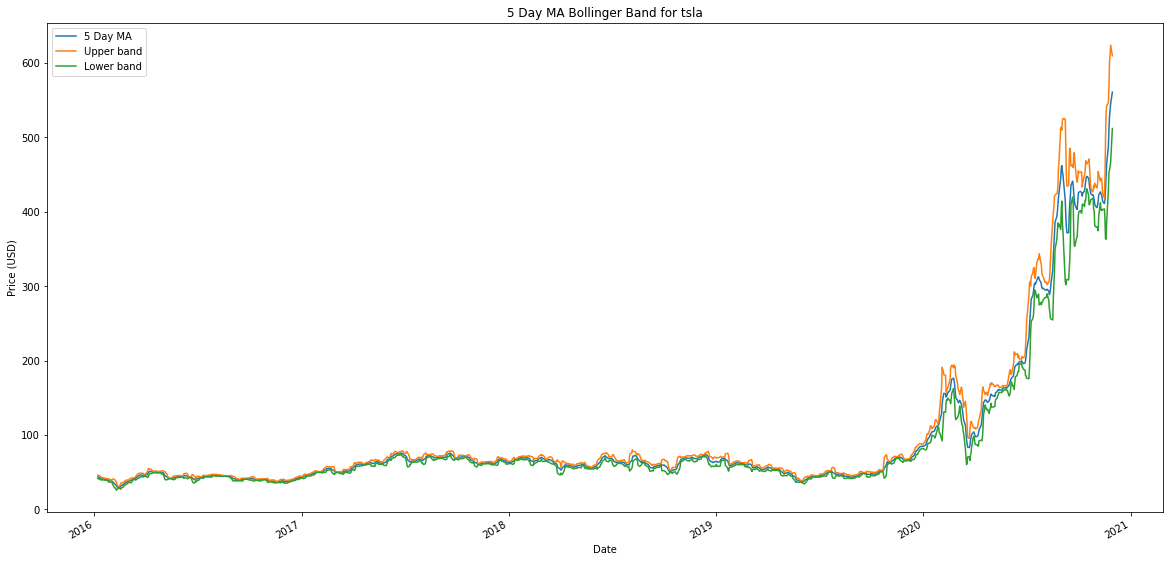

In [31]:
Bollinger_Band('tsla', '1/1/2016', '30/11/2020', 5)

## 10 Day MA Tesla 

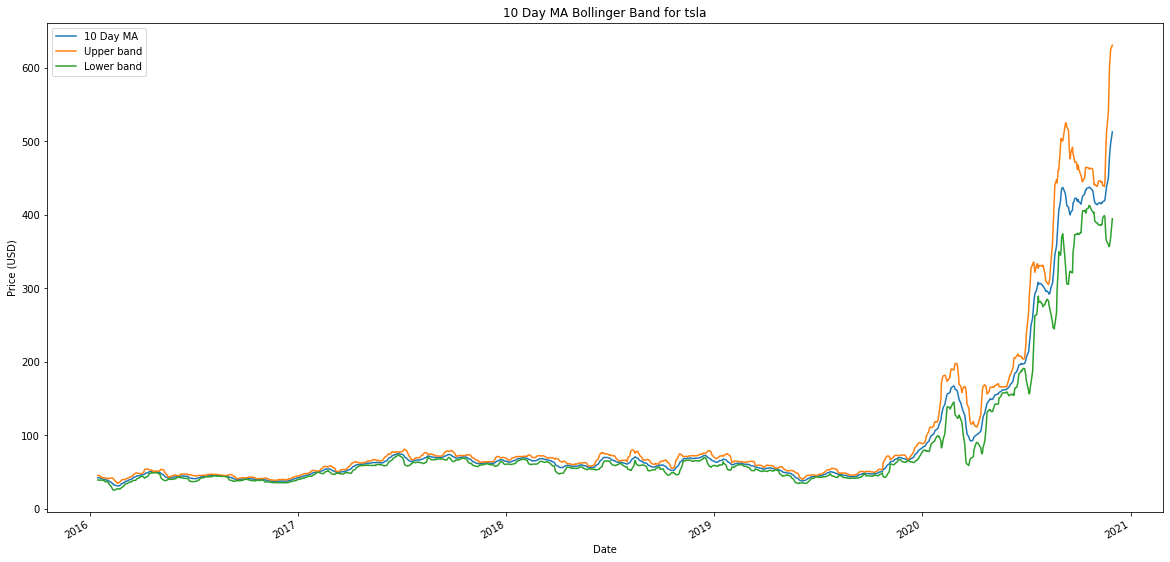

In [29]:
Bollinger_Band('tsla', '1/1/2016', '30/11/2020', 10)

## 20 Day MA Tesla 

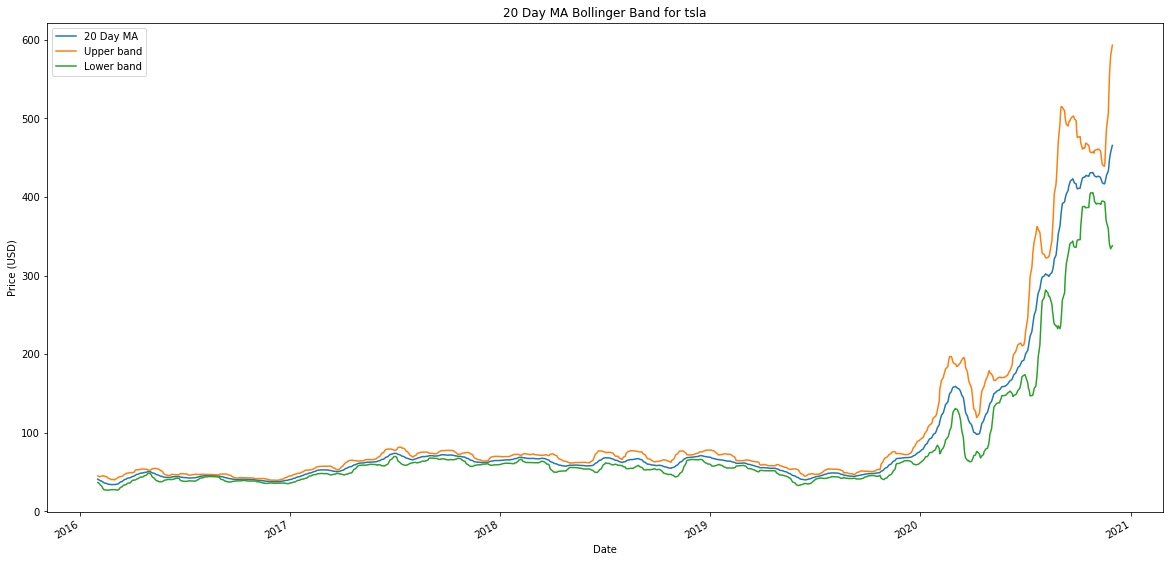

In [27]:
Bollinger_Band('tsla', '1/1/2016', '30/11/2020', 20)

## 30 Day MA Tesla 

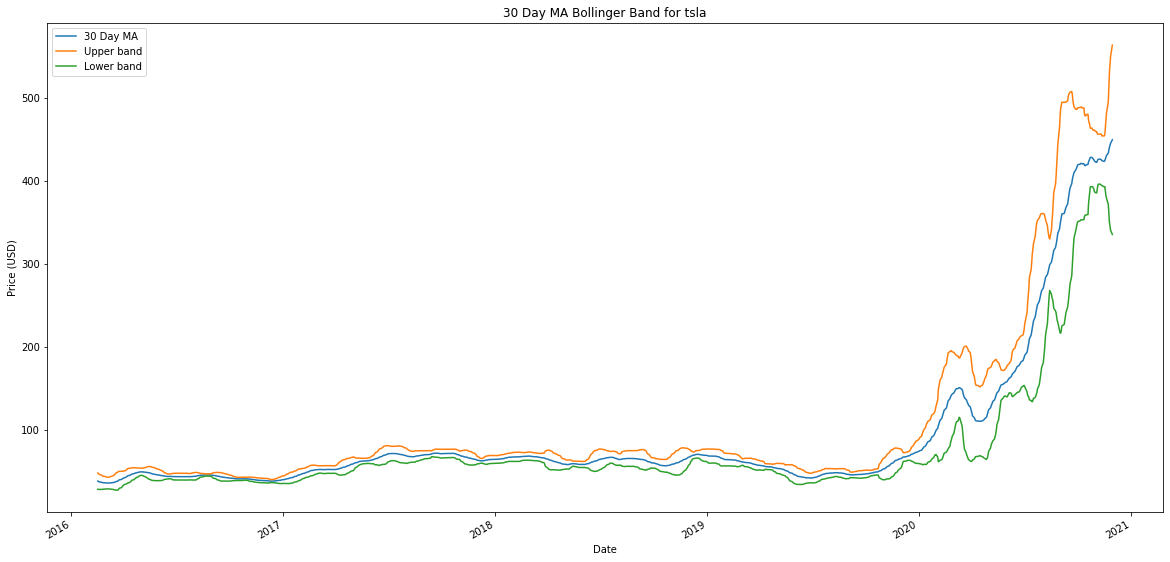

In [28]:
Bollinger_Band('tsla', '1/1/2016', '30/11/2020', 30)